<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/deeplearning_bookIMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras import layers , models
from tensorflow.keras import optimizers

In [2]:
(train_data,train_labels) , (test_data,test_labels) = imdb.load_data(num_words = 10000)
train_data[0]

17473536/17464789 [==============================] - 0s 0us/step


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [4]:
#imdb.get_word_index() The word index dictionary. Keys are word strings, values are their index.
word_index = imdb.get_word_index() #word_index is a dictionary

#word_index.items() ==> returns a list each element is tuple first element is key and second element is value
#list comperhensive to reverse the places [indexes] of tuple elements(key and value)
#then convert it to dictionary
#reverse_word_index is a dictionary exactly like word_index but key and value are reversed
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 

#.get function used with dictionary and take key as a first element and return the value specified with this key 
#.get take optional parameter in our case is "?" which is returned if key is not found in dictionary keys
#train_data[0] is a list of numbers that are just indexes of words that represent comment of first sample
#decoded_review is just the comment of first sample in string form
#train_data[0] is just the comment of first sample in term of indexes of words in that comment
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
print("train_data shape is ",train_data.shape)
print("test_data shape is ",test_data.shape)
print("train_labels shape is ",train_labels.shape)
print("test shape is ",test_labels.shape)

train_data shape is  (25000,)
test_data shape is  (25000,)
train_labels shape is  (25000,)
test shape is  (25000,)


In [6]:
#up to now the train data and test data are in form of list of integers
#neural network can not deal with lists
#we want to convert it to tensors 
#this can be done by two way first by
#[1]-pading lists to be in form of list tensor shape will be (num_samples,word_indexes) 
#note that train_data[i] not fixed length it depend on the index so we need to pade small samples to biger on 
#[2]-by hot encoding of all samples to a fixed length (10000)[that equal to the number of words we have chosen in cell 2 first line]
#this will return tensor dimension [num_samples,10000]
#this can be done by following function 

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  """
  this functoin take two parameters 
  first one is sequences such as train_data or test_data
  second one is dimention we need to add 
  returns a results its dimention is [len(sequences),dimention]
  """
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences): # i represent the index of sample , sequence will be list of word indexes  of first sample(comment)
  #every row of result will contains only 1s and 0s 
  #1 at index found in sequence and 0 elsewhere

    results[i, sequence] = 1.
  return results






In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train.shape

(25000, 10000)

In [9]:
#just convert type to float32 instead of float64
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



In [10]:
#now we will construct the model 
#since the input and output just zeros and ones all we need is Dense hidden layers
model = models.Sequential()
model.add(layers.Dense(16,activation = "relu",input_shape =(10000,)))
model.add(layers.Dense(16,activation= "relu"))
model.add(layers.Dense(1,activation = "sigmoid"))



In [11]:
#binary_crossentropy loss is best choice for binary classification
""" Crossentropy is a quantity from the field of Information Theory that 
measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions. """
#model.compile(optimizer="rmsprop",loss="Crossentropy",metrics =["accuracy"])

#another code do the same thing
#this provide more control on optimizer and learning rate
model.compile(optimizer=optimizers.Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
partial_y_train = y_train[5000:]
y_val = y_train[:5000]


In [13]:
history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=256, validation_data=(x_val, y_val))

Epoch 1/4
79/79 [==============================] - 3s 23ms/step - loss: 0.4552 - accuracy: 0.8153 - val_loss: 0.2962 - val_accuracy: 0.8832
Epoch 2/4
79/79 [==============================] - 1s 17ms/step - loss: 0.2221 - accuracy: 0.9204 - val_loss: 0.2735 - val_accuracy: 0.8910
Epoch 3/4
79/79 [==============================] - 1s 17ms/step - loss: 0.1567 - accuracy: 0.9460 - val_loss: 0.2924 - val_accuracy: 0.8898
Epoch 4/4
79/79 [==============================] - 1s 17ms/step - loss: 0.1188 - accuracy: 0.9614 - val_loss: 0.3183 - val_accuracy: 0.8832


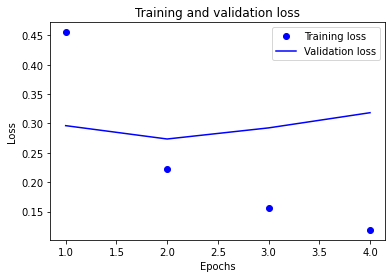

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history #return history dictionary which consist of 4 keys (['loss', 'accuracy', 'val_loss', 'val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

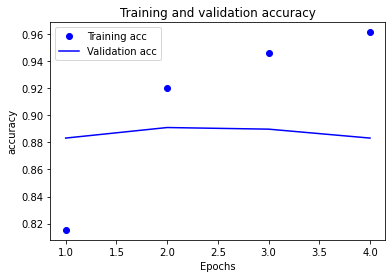

In [15]:
plt.clf()# to clear current figure if found
acc = history_dict["accuracy"]
val_acc  = history_dict["val_accuracy"]
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test) #to evaluate model performance in test data it returns loss and accuracy [metrics["accuracy"]]

782/782 [==============================] - 2s 2ms/step - loss: 0.3478 - accuracy: 0.8724


In [17]:
results

[0.3477935194969177, 0.8723599910736084]

In [30]:
#to use model for predicting new data
y_pred = model.predict(x_test)


In [31]:
def zero_one(x):
  if x>0.5:
    return 1
  else:
    return 0


In [35]:
y_pred = np.array(list(map(zero_one , y_pred))) # to covert output to zero or one